In [1]:
import os

import scipy.stats
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
random_seed = 1011

# 1. Data processing

## 1.1 Load data

In [3]:
origin_data = pd.read_csv("data/covid_death_dataset.csv")

In [4]:
origin_data.describe(include='all')

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
unique,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,9999-99-99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,971633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,NaN,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,NaN,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,NaN,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01


In [5]:
origin_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


## 1.2 Data processing

The dataset was provided by the Mexican government (https://datos.gob.mx/busca/dataset/informacion-referente-a-casos-covid-19-en-mexico). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

classification_final: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.  
sex: 1 for female and 2 for male.  
age: of the patient.  
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.  
pneumonia: whether the patient already have air sacs inflammation or not.  
pregnancy: whether the patient is pregnant or not.  
diabetes: whether the patient has diabetes or not.  
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.  
asthma: whether the patient has asthma or not.  
inmsupr: whether the patient is immunosuppressed or not.  
hypertension: whether the patient has hypertension or not.  
cardiovascular: whether the patient has heart or blood vessels related disease.   
renal chronic: whether the patient has chronic renal disease or not.  
other disease: whether the patient has other disease or not.  
obesity: whether the patient is obese or not.  
tobacco: whether the patient is a tobacco user.  
usmr: Indicates whether the patient treated medical units of the first, second or third level.  
medical unit: type of institution of the National Health System that provided the care.  
intubed: whether the patient was connected to the ventilator.  
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.  
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.  

In [6]:
def code_converter(coded_value):
    if coded_value == 1:
        value = "Yes"
    elif coded_value == 2:
        value = "No"
    else:
        value = "Unknown"
    return value

In [7]:
origin_data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [8]:
data = origin_data.copy()
data['SEX'] = origin_data['SEX'].apply(lambda x: "female" if x==1 else "male")
data['PATIENT_TYPE'] = origin_data['PATIENT_TYPE'].apply(lambda x: "Return_home" if x==1 else "Hospitalization")
data['INTUBED'] = origin_data['INTUBED'].apply(code_converter)

data['PNEUMONIA'] = origin_data['PNEUMONIA'].apply(code_converter)
data['PREGNANT'] = origin_data['PREGNANT'].apply(code_converter)
data['DIABETES'] = origin_data['DIABETES'].apply(code_converter)
data['COPD'] = origin_data['COPD'].apply(code_converter)
data['ASTHMA'] = origin_data['ASTHMA'].apply(code_converter)

data['INMSUPR'] = origin_data['INMSUPR'].apply(code_converter)
data['HIPERTENSION'] = origin_data['HIPERTENSION'].apply(code_converter)
data['OTHER_DISEASE'] = origin_data['OTHER_DISEASE'].apply(code_converter)
data['CARDIOVASCULAR'] = origin_data['CARDIOVASCULAR'].apply(code_converter)

data['OBESITY'] = origin_data['OBESITY'].apply(code_converter)
data['RENAL_CHRONIC'] = origin_data['RENAL_CHRONIC'].apply(code_converter)
data['TOBACCO'] = origin_data['TOBACCO'].apply(code_converter)
data['CLASIFFICATION_FINAL'] = origin_data['CLASIFFICATION_FINAL'].apply(code_converter)
data['ICU'] = origin_data['ICU'].apply(code_converter)

## 1.3 Feature engineering

### 1.3.1 Features

In [9]:
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,female,Return_home,03/05/2020,Unknown,Yes,65,No,No,No,No,No,Yes,No,No,No,No,No,Unknown,Unknown
1,2,1,male,Return_home,03/06/2020,Unknown,Yes,72,Unknown,No,No,No,No,Yes,No,No,Yes,Yes,No,Unknown,Unknown
2,2,1,male,Hospitalization,09/06/2020,Yes,No,55,Unknown,Yes,No,No,No,No,No,No,No,No,No,Unknown,No
3,2,1,female,Return_home,12/06/2020,Unknown,No,53,No,No,No,No,No,No,No,No,No,No,No,Unknown,Unknown
4,2,1,male,Return_home,21/06/2020,Unknown,No,68,Unknown,Yes,No,No,No,Yes,No,No,No,No,No,Unknown,Unknown


In [10]:
def one_hot_encode_column(df, column_name):
    one_hot = pd.get_dummies(df[column_name], prefix=column_name)
    df = df.drop(column_name,axis = 1)
    df = df.join(one_hot)
    return df

In [11]:
feature_df = data.copy()
feature_df = one_hot_encode_column(feature_df, 'USMER')
feature_df = one_hot_encode_column(feature_df, 'MEDICAL_UNIT')
feature_df = one_hot_encode_column(feature_df, 'SEX')
feature_df = one_hot_encode_column(feature_df, 'PATIENT_TYPE')
feature_df = one_hot_encode_column(feature_df, 'INTUBED')

feature_df = one_hot_encode_column(feature_df, 'PNEUMONIA')
feature_df = one_hot_encode_column(feature_df, 'PREGNANT')
feature_df = one_hot_encode_column(feature_df, 'DIABETES')
feature_df = one_hot_encode_column(feature_df, 'COPD')
feature_df = one_hot_encode_column(feature_df, 'ASTHMA')

feature_df = one_hot_encode_column(feature_df, 'INMSUPR')
feature_df = one_hot_encode_column(feature_df, 'HIPERTENSION')
feature_df = one_hot_encode_column(feature_df, 'OTHER_DISEASE')
feature_df = one_hot_encode_column(feature_df, 'CARDIOVASCULAR')

feature_df = one_hot_encode_column(feature_df, 'OBESITY')
feature_df = one_hot_encode_column(feature_df, 'RENAL_CHRONIC')
feature_df = one_hot_encode_column(feature_df, 'TOBACCO')
feature_df = one_hot_encode_column(feature_df, 'CLASIFFICATION_FINAL')
feature_df = one_hot_encode_column(feature_df, 'ICU')

In [12]:
# rescale age
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_df['AGE'] = scaler.fit_transform(feature_df['AGE'].values.reshape(-1, 1))

### 1.3.2 Generate death data as y

In [13]:
print(f"# of death: {data[data['DATE_DIED'] != '9999-99-99'].shape[0]}, from total {data.shape[0]}. Death rate= {data[data['DATE_DIED'] != '9999-99-99'].shape[0]/data.shape[0]*100}%")
feature_df['DEATH'] = feature_df['DATE_DIED'].apply(lambda x: False if x=='9999-99-99' else True)

# of death: 76942, from total 1048575. Death rate= 7.337767923133777%


### 1.3.3 Feature selection

In [14]:
feature_df.head()

,DATE_DIED,AGE,USMER_1,USMER_2,MEDICAL_UNIT_1,MEDICAL_UNIT_2,MEDICAL_UNIT_3,MEDICAL_UNIT_4,MEDICAL_UNIT_5,MEDICAL_UNIT_6,MEDICAL_UNIT_7,MEDICAL_UNIT_8,MEDICAL_UNIT_9,MEDICAL_UNIT_10,MEDICAL_UNIT_11,MEDICAL_UNIT_12,MEDICAL_UNIT_13,SEX_female,SEX_male,PATIENT_TYPE_Hospitalization,PATIENT_TYPE_Return_home,INTUBED_No,INTUBED_Unknown,INTUBED_Yes,PNEUMONIA_No,PNEUMONIA_Unknown,PNEUMONIA_Yes,PREGNANT_No,PREGNANT_Unknown,PREGNANT_Yes,DIABETES_No,DIABETES_Unknown,DIABETES_Yes,COPD_No,COPD_Unknown,COPD_Yes,ASTHMA_No,ASTHMA_Unknown,ASTHMA_Yes,INMSUPR_No,INMSUPR_Unknown,INMSUPR_Yes,HIPERTENSION_No,HIPERTENSION_Unknown,HIPERTENSION_Yes,OTHER_DISEASE_No,OTHER_DISEASE_Unknown,OTHER_DISEASE_Yes,CARDIOVASCULAR_No,CARDIOVASCULAR_Unknown,CARDIOVASCULAR_Yes,OBESITY_No,OBESITY_Unknown,OBESITY_Yes,RENAL_CHRONIC_No,RENAL_CHRONIC_Unknown,RENAL_CHRONIC_Yes,TOBACCO_No,TOBACCO_Unknown,TOBACCO_Yes,CLASIFFICATION_FINAL_No,CLASIFFICATION_FINAL_Unknown,CLASIFFICATION_FINAL_Yes,ICU_No,ICU_Unknown,ICU_Yes,DEATH
0,03/05/2020,0.537190,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True
1,03/06/2020,0.595041,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,False,True,False,False,True,False,True
2,09/06/2020,0.454545,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,True,False,False,True
3,12/06/2020,0.438017,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True
4,21/06/2020,0.561983,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,True


In [15]:
feature_df.columns

Index(['DATE_DIED', 'AGE', 'USMER_1', 'USMER_2', 'MEDICAL_UNIT_1',
       'MEDICAL_UNIT_2', 'MEDICAL_UNIT_3', 'MEDICAL_UNIT_4', 'MEDICAL_UNIT_5',
       'MEDICAL_UNIT_6', 'MEDICAL_UNIT_7', 'MEDICAL_UNIT_8', 'MEDICAL_UNIT_9',
       'MEDICAL_UNIT_10', 'MEDICAL_UNIT_11', 'MEDICAL_UNIT_12',
       'MEDICAL_UNIT_13', 'SEX_female', 'SEX_male',
       'PATIENT_TYPE_Hospitalization', 'PATIENT_TYPE_Return_home',
       'INTUBED_No', 'INTUBED_Unknown', 'INTUBED_Yes', 'PNEUMONIA_No',
       'PNEUMONIA_Unknown', 'PNEUMONIA_Yes', 'PREGNANT_No', 'PREGNANT_Unknown',
       'PREGNANT_Yes', 'DIABETES_No', 'DIABETES_Unknown', 'DIABETES_Yes',
       'COPD_No', 'COPD_Unknown', 'COPD_Yes', 'ASTHMA_No', 'ASTHMA_Unknown',
       'ASTHMA_Yes', 'INMSUPR_No', 'INMSUPR_Unknown', 'INMSUPR_Yes',
       'HIPERTENSION_No', 'HIPERTENSION_Unknown', 'HIPERTENSION_Yes',
       'OTHER_DISEASE_No', 'OTHER_DISEASE_Unknown', 'OTHER_DISEASE_Yes',
       'CARDIOVASCULAR_No', 'CARDIOVASCULAR_Unknown', 'CARDIOVASCULAR_Yes',
  

In [16]:
selected_df = feature_df[['DEATH', 'AGE', 'USMER_1', 'USMER_2', 'MEDICAL_UNIT_1',
       'MEDICAL_UNIT_2', 'MEDICAL_UNIT_3', 'MEDICAL_UNIT_4', 'MEDICAL_UNIT_5',
       'MEDICAL_UNIT_6', 'MEDICAL_UNIT_7', 'MEDICAL_UNIT_8', 'MEDICAL_UNIT_9',
       'MEDICAL_UNIT_10', 'MEDICAL_UNIT_11', 'MEDICAL_UNIT_12',
       'MEDICAL_UNIT_13', 'SEX_female', 'SEX_male',
       'PATIENT_TYPE_Hospitalization', 'PATIENT_TYPE_Return_home',
       'INTUBED_No', 'INTUBED_Unknown', 'INTUBED_Yes', 'PNEUMONIA_No',
       'PNEUMONIA_Unknown', 'PNEUMONIA_Yes', 'PREGNANT_No', 'PREGNANT_Unknown',
       'PREGNANT_Yes', 'DIABETES_No', 'DIABETES_Unknown', 'DIABETES_Yes',
       'COPD_No', 'COPD_Unknown', 'COPD_Yes', 'ASTHMA_No', 'ASTHMA_Unknown',
       'ASTHMA_Yes', 'INMSUPR_No', 'INMSUPR_Unknown', 'INMSUPR_Yes',
       'HIPERTENSION_No', 'HIPERTENSION_Unknown', 'HIPERTENSION_Yes',
       'OTHER_DISEASE_No', 'OTHER_DISEASE_Unknown', 'OTHER_DISEASE_Yes',
       'CARDIOVASCULAR_No', 'CARDIOVASCULAR_Unknown', 'CARDIOVASCULAR_Yes',
       'OBESITY_No', 'OBESITY_Unknown', 'OBESITY_Yes', 'RENAL_CHRONIC_No',
       'RENAL_CHRONIC_Unknown', 'RENAL_CHRONIC_Yes', 'TOBACCO_No',
       'TOBACCO_Unknown', 'TOBACCO_Yes', 'CLASIFFICATION_FINAL_No',
       'CLASIFFICATION_FINAL_Unknown', 'CLASIFFICATION_FINAL_Yes', 'ICU_No',
       'ICU_Unknown', 'ICU_Yes']]

In [17]:
selected_df = selected_df.drop_duplicates()
selected_df = selected_df.dropna()

In [18]:
selected_df.shape

(155126, 66)

In [178]:
# columns = selected_df.columns
# scaler = MinMaxScaler((0.01, 0.99))
# scaled_selected_df = scaler.fit_transform(selected_df)
# scaled_selected_df = pd.DataFrame(scaled_selected_df, columns=columns)

In [179]:
sampled_10_scaled_selected_df = selected_df.sample(frac=0.1, random_state=random_seed)
sampled_25_scaled_selected_df = selected_df.sample(frac=0.25, random_state=random_seed)

In [180]:
X = selected_df.drop("DEATH", axis=1)
y = selected_df[["DEATH"]]

columns = X.columns
scaler = MinMaxScaler((0.01, 0.99))
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)

X_sample = sampled_10_scaled_selected_df.drop("DEATH", axis=1)
y_sample = sampled_10_scaled_selected_df[["DEATH"]]

columns = X_sample.columns
scaler = MinMaxScaler((0.01, 0.99))
X_sample = scaler.fit_transform(X_sample)
X_sample = pd.DataFrame(X_sample, columns=columns)

X_sample_25 = sampled_25_scaled_selected_df.drop("DEATH", axis=1)
y_sample_25 = sampled_25_scaled_selected_df[["DEATH"]]

columns = X_sample.columns
scaler = MinMaxScaler((0.01, 0.99))
X_sample_25 = scaler.fit_transform(X_sample_25)
X_sample_25 = pd.DataFrame(X_sample_25, columns=columns)

# 2. Clustering

## 2.1 EM

In [126]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV

In [127]:
def gmm_bic(estimator, X):
    return -estimator.bic(X)

In [128]:
param_grid = {
    "n_components": range(2, 31),
    "covariance_type": ["full"],
}

In [129]:
# grid_search = GridSearchCV(
#     GaussianMixture(), param_grid=param_grid, scoring=gmm_bic, n_jobs=-1,
# )
# grid_search.fit(X_sample)

GridSearchCV(estimator=GaussianMixture(), n_jobs=-1,
             param_grid={'covariance_type': ['full'],
                         'n_components': range(2, 31)},
             scoring=<function gmm_bic at 0x7fb1a01116c0>)

In [326]:
from sklearn.metrics import silhouette_score

gmm_result = []
for n_component in range(2, 31):
    print(f"n_component: {n_component}")
    gmm = GaussianMixture(n_components=n_component, covariance_type='full')
    labels = gmm.fit_predict(X_sample)
    bic_score = gmm.bic(X_sample)
    sh_score = silhouette_score(X_sample, labels, metric='euclidean')
    
    gmm_result.append([n_component, bic_score, sh_score])
    
gmm_df = pd.DataFrame(gmm_result, columns=['n_component', 'bic_score', 'silhouette_score'])

n_component: 2
n_component: 3
n_component: 4
n_component: 5
n_component: 6
n_component: 7
n_component: 8
n_component: 9
n_component: 10
n_component: 11
n_component: 12
n_component: 13
n_component: 14
n_component: 15
n_component: 16
n_component: 17
n_component: 18
n_component: 19
n_component: 20
n_component: 21
n_component: 22
n_component: 23
n_component: 24
n_component: 25
n_component: 26
n_component: 27
n_component: 28
n_component: 29
n_component: 30


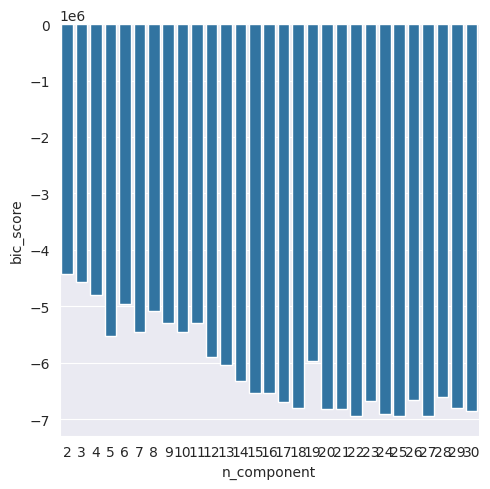

In [327]:
import seaborn as sns

sns.catplot(
    data=gmm_df,
    kind="bar",
    x="n_component",
    y="bic_score",
)
plt.show()

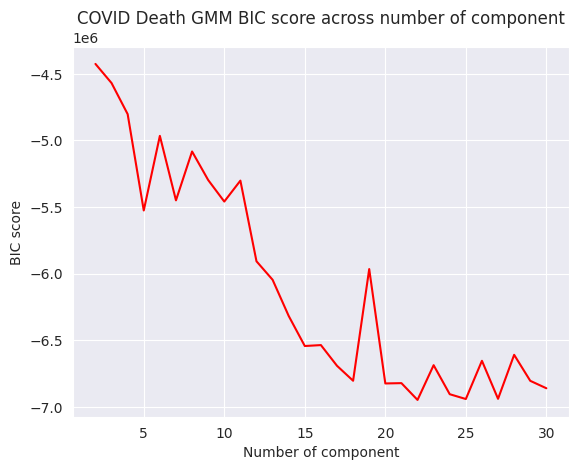

In [381]:
import seaborn as sns

plt.plot(gmm_df['n_component'], gmm_df['bic_score'], color='r')


# sns.catplot(
#     data=gmm_df,
#     kind="bar",
#     x="Number of components",
#     y="BIC score",
#     hue="Type of covariance",
# )
plt.xlabel("Number of component")
plt.ylabel("BIC score")
plt.title("COVID Death GMM BIC score across number of component")
plt.show()

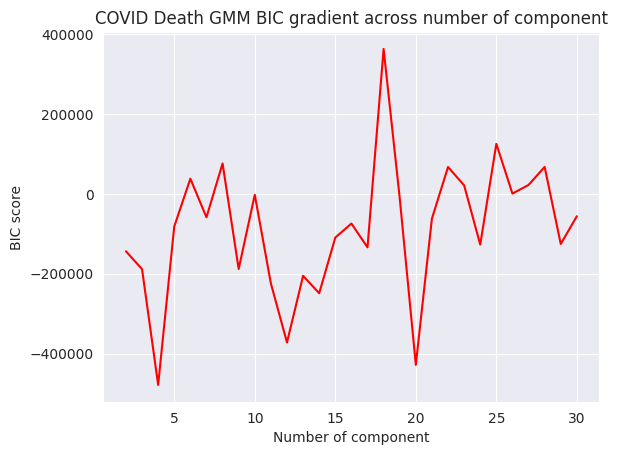

In [382]:
plt.figure()
plt.plot(gmm_df['n_component'], np.gradient(gmm_df['bic_score']), color='r')


# sns.catplot(
#     data=gmm_df,
#     kind="bar",
#     x="Number of components",
#     y="BIC score",
#     hue="Type of covariance",
# )
plt.xlabel("Number of component")
plt.ylabel("BIC score")
plt.title("COVID Death GMM BIC gradient across number of component")
plt.show()

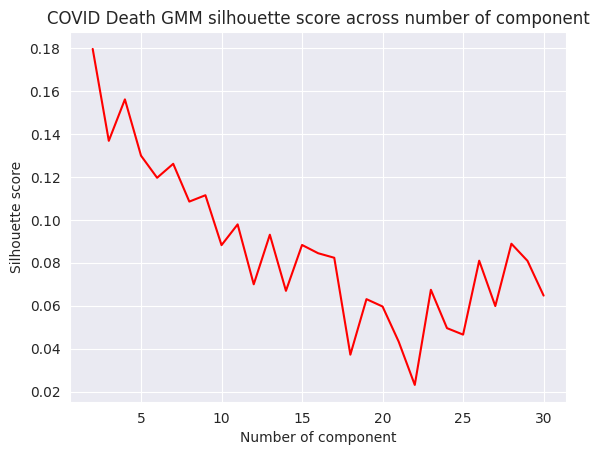

In [384]:
plt.plot(gmm_df['n_component'], gmm_df['silhouette_score'], color='r')


# sns.catplot(
#     data=gmm_df,
#     kind="bar",
#     x="Number of components",
#     y="BIC score",
#     hue="Type of covariance",
# )
plt.xlabel("Number of component")
plt.ylabel("Silhouette score")
plt.title("COVID Death GMM silhouette score across number of component")
plt.show()

In [336]:
best_gmm = GaussianMixture(n_components=4, covariance_type='full')
best_gmm.fit(X_sample)

GaussianMixture(n_components=4)

In [337]:
bic_score = best_gmm.bic(X_sample)

In [338]:
bic_score

-4802584.272541039

In [339]:
gmm_clusters_labels = best_gmm.predict(X)

In [340]:
len(np.unique(gmm_clusters_labels))

4

## 2.2 DBSCAN

In [138]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid

param_grid = {
    'eps': np.arange(0.2, 2.4, 0.2),
    'min_samples': [5]
}

best_score = -1
best_params = None

result_scores = []

for params in ParameterGrid(param_grid):
    print("params['eps']:", params['eps'])
    dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
    labels = dbscan.fit_predict(X_sample)
    
    # Calculate the silhouette score as the evaluation metric
    score = silhouette_score(X_sample, labels)
    
    if score > best_score:
        best_score = score
        best_params = params
        
    result_scores.append([params['eps'], params['min_samples'], score])
    



params['eps']: 0.2
params['eps']: 0.4
params['eps']: 0.6000000000000001
params['eps']: 0.8
params['eps']: 1.0
params['eps']: 1.2
params['eps']: 1.4000000000000001
params['eps']: 1.6
params['eps']: 1.8
params['eps']: 2.0
params['eps']: 2.2


In [139]:
best_eps = best_params['eps']
best_min_samples = best_params['min_samples']

best_dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
best_dbscan_labels = best_dbscan.fit_predict(X)

dbscan_score_df = pd.DataFrame(result_scores, columns=['eps', 'min_samples', 'score'])

In [168]:
best_dbscan = DBSCAN(eps=0.4, min_samples=best_min_samples)
best_dbscan_labels = best_dbscan.fit_predict(X)

In [169]:
np.unique(best_dbscan_labels)

array([  -1,    0,    1, ..., 5637, 5638, 5639])

In [140]:
dbscan_score_df

,eps,min_samples,score
0,0.2,5,-0.071943
1,0.4,5,0.010880
2,0.6,5,0.014403
3,0.8,5,0.014403
4,1.0,5,0.014403
5,1.2,5,0.014403
6,1.4,5,0.108367
7,1.6,5,0.117416
8,1.8,5,0.117416
9,2.0,5,0.140192


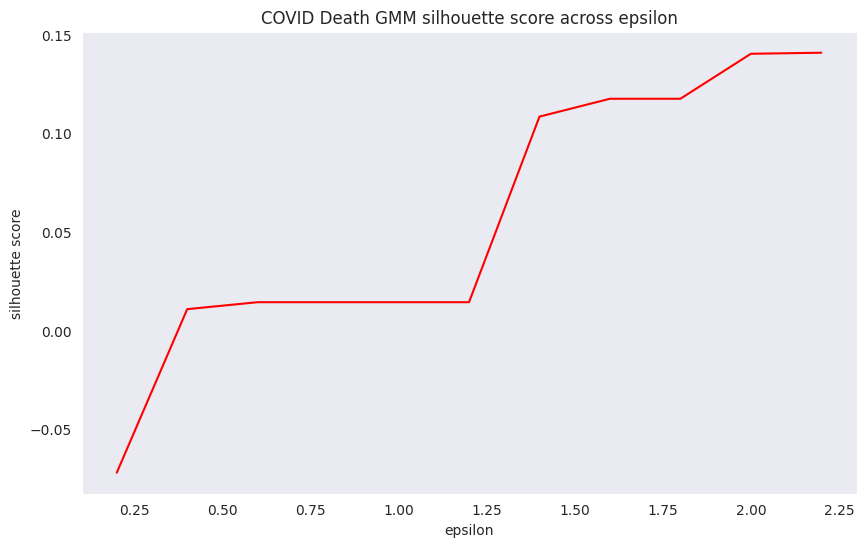

In [385]:
plt.figure(figsize=(10, 6))
plt.plot(dbscan_score_df['eps'], dbscan_score_df['score'], color='r')
plt.xlabel("epsilon")
plt.ylabel("silhouette score")
plt.title("COVID Death GMM silhouette score across epsilon")
plt.grid()
plt.show()

In [142]:
# from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, \
#     adjusted_mutual_info_score
# 
# print(f"Homogeneity: {homogeneity_score(labels_true, labels):.3f}")
# print(f"Completeness: {completeness_score(labels_true, labels):.3f}")
# print(f"V-measure: {v_measure_score(labels_true, labels):.3f}")
# print(f"Adjusted Rand Index: {adjusted_rand_score(labels_true, labels):.3f}")
# print(
#     "Adjusted Mutual Information:"
#     f" {adjusted_mutual_info_score(labels_true, labels):.3f}"
# )
# print(f"Silhouette Coefficient: {silhouette_score(X, labels):.3f}")

In [143]:
np.unique(best_dbscan_labels)

array([-1,  0])

# 3. Dimensionality Reduction

## 3.1 PCA

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=30, random_state=random_seed)
pca.fit(X_sample)

PCA(n_components=30, random_state=1011)

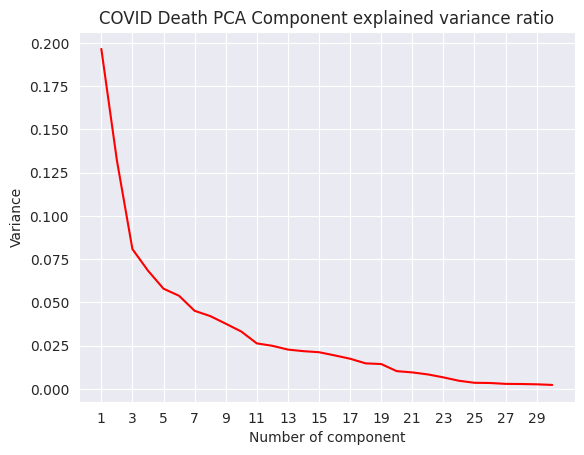

In [386]:
plt.figure()
plt.plot(np.arange(1, pca.explained_variance_ratio_.size + 1), pca.explained_variance_ratio_, color='r')
plt.xticks(np.arange(1, pca.explained_variance_ratio_.size + 1, 2))
plt.xlabel('Number of component')
plt.ylabel('Variance')
plt.title('COVID Death PCA Component explained variance ratio')
plt.show()


In [42]:
X_reduced_PCA = PCA(n_components = 11).fit_transform(X_sample_25)
# X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.3, random_state=42)

In [43]:
X_reduced_PCA.shape

(38782, 11)

In [44]:
os.makedirs("output", exist_ok=True)

In [45]:
np.save("X_reduced_PCA.npy", X_reduced_PCA)

## 3.2 ICA

In [46]:
from sklearn.decomposition import FastICA

ica_kurtosis_list = []
best_kurtosis = -np.inf
best_n_component = -1

for n_component in range(1, 31):
    X_ica = FastICA(n_components=n_component).fit_transform(X)
    kurtosis = scipy.stats.kurtosis(X_ica)
    mean_kurtosis = np.mean(kurtosis)/n_component
    ica_kurtosis_list.append([n_component, mean_kurtosis])
    
    if mean_kurtosis > best_kurtosis:
        best_kurtosis = mean_kurtosis
        best_n_component = n_component
    
ica_kurtosis_df = pd.DataFrame(ica_kurtosis_list, columns=['n_component', 'kurtosis_val'])

In [47]:
best_n_component

30

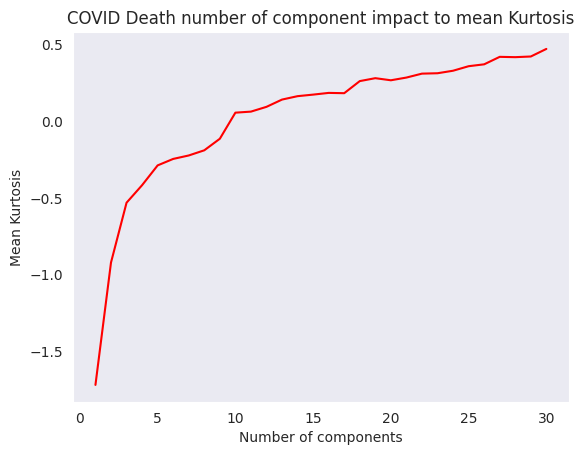

In [387]:
plt.plot(ica_kurtosis_df['n_component'], ica_kurtosis_df['kurtosis_val'], color='r')
plt.xlabel('Number of components')
plt.ylabel('Mean Kurtosis')
plt.title('COVID Death number of component impact to mean Kurtosis')
plt.grid()
plt.savefig('bc_ica_kurtosis.png')
plt.show()

In [49]:
X_reduced_ICA = FastICA(n_components = best_n_component).fit_transform(X_sample_25)
# X_ICA_train, X_ICA_test, y_ICA_train, y_ICA_test = train_test_split(X_ICA, y, test_size=0.3, random_state=42)

In [50]:
np.save("X_reduced_ICA.npy", X_reduced_ICA)

## 3.3 RP

In [51]:
from sklearn.metrics import mean_squared_error
from numpy.linalg import pinv
from sklearn import random_projection 
rp_gaussian_reconstruction_mse = []

best_mse = np.inf
best_n_component = -1

for n_component in range(2,31):
    mean_mse = []
    for j in range(5):
        rp_gaussian = random_projection.GaussianRandomProjection(n_components=n_component)
        X_rp_gaussian = rp_gaussian.fit_transform(X)
        
        X_reconstruction = rp_gaussian.inverse_transform(X_rp_gaussian)

        mse = mean_squared_error(X, X_reconstruction)
        mean_mse.append(mse)

    rp_gaussian_reconstruction_mse.append([n_component, np.mean(mean_mse)])

# plt.plot(np.arange(1,30),reconstruction_error)
# plt.fill_between(np.arange(1,30),reconstruction_error - reconstruction_variance, reconstruction_error + reconstruction_variance, alpha=0.2)
# plt.xlabel('Components')
# plt.ylabel('Reconstruction Error for RP')
# plt.title('Reconstruction error vs. Number of Components for RP (BCW)')
# plt.grid()
# plt.savefig('bc_rp_error.png')
# plt.show()

In [52]:
rp_gaussian_mse_df = pd.DataFrame(rp_gaussian_reconstruction_mse, columns=['n_component', 'reconstruction_mse'])
rp_gaussian_mse_df

,n_component,reconstruction_mse
0,2,0.280001
1,3,0.275015
2,4,0.268415
3,5,0.269828
4,6,0.266688
5,7,0.255255
6,8,0.255281
7,9,0.240786
8,10,0.248462
9,11,0.246085


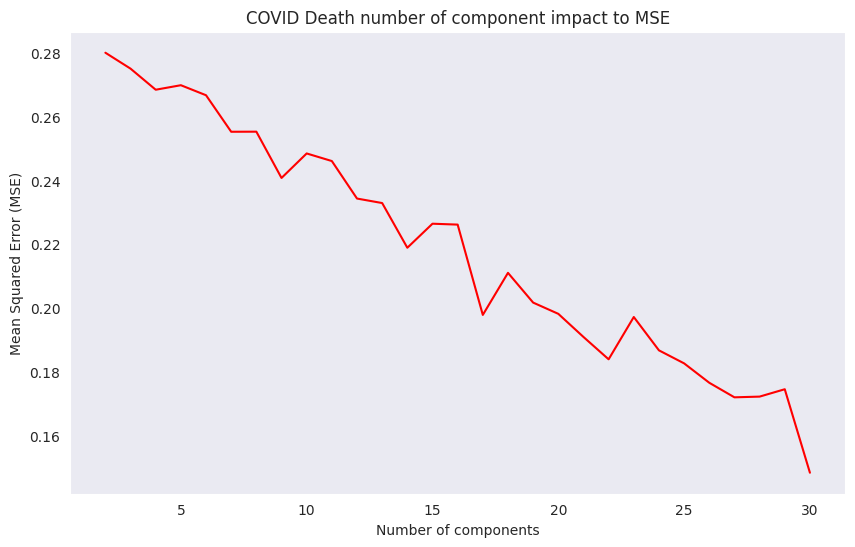

In [388]:
plt.figure(figsize=(10, 6))
plt.plot(rp_gaussian_mse_df['n_component'], rp_gaussian_mse_df['reconstruction_mse'], color='r')
plt.xlabel('Number of components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('COVID Death number of component impact to MSE')
plt.grid()
plt.show()

In [54]:
rp_gaussian = random_projection.GaussianRandomProjection(n_components=11)
X_reduced_rp_gaussian = rp_gaussian.fit_transform(X_sample_25)

In [55]:
np.save("X_reduced_rp_gaussian.npy", X_reduced_rp_gaussian)

In [56]:
# rp_gaussian = random_projection.SparseRandomProjection()
# 
# 
# from sklearn.metrics import mean_squared_error
# from numpy.linalg import pinv
# from sklearn import random_projection 
# rp_sparse_reconstruction_mse = []
# 
# for n_component in range(2,31):
#     mean_mse = []
#     for j in range(5):
#         rp_sparse = random_projection.SparseRandomProjection(n_components=n_component)
#         X_rp_sparse = rp_sparse.fit_transform(X)
#         X_reconstruction = rp_sparse.inverse_transform(X_rp_sparse)
# 
#         mse = mean_squared_error(X, X_reconstruction)
#         mean_mse.append(mse)
#         
#     rp_sparse_reconstruction_mse.append([n_component, np.mean(mean_mse)])


## 3.4 Locally Linear Embedding

In [57]:
# from sklearn.manifold import LocallyLinearEmbedding
# 
# lle = LocallyLinearEmbedding(n_components=10, method='standard', n_neighbors=10, n_jobs=-1)
# lle.fit(X)

In [58]:
from sklearn.manifold import LocallyLinearEmbedding

lle_reconstruction_errors = []
best_error = -np.inf
best_n_component = -1

for n_component in range(2,31):
    print(f"n_component: {n_component}") 
    lle = LocallyLinearEmbedding(n_components=n_component, method='standard', n_neighbors=10, n_jobs=-1)
    lle.fit(X_sample)
    error = lle.reconstruction_error_
    
    if error < best_error:
        best_error = error
        best_n_component = n_component
    
    lle_reconstruction_errors.append([n_component, error])

n_component: 2
n_component: 3
n_component: 4
n_component: 5
n_component: 6
n_component: 7
n_component: 8
n_component: 9
n_component: 10
n_component: 11
n_component: 12
n_component: 13
n_component: 14
n_component: 15
n_component: 16
n_component: 17
n_component: 18
n_component: 19
n_component: 20
n_component: 21
n_component: 22
n_component: 23
n_component: 24
n_component: 25
n_component: 26
n_component: 27
n_component: 28
n_component: 29
n_component: 30


In [59]:
lle_reconstruction_errors_df = pd.DataFrame(lle_reconstruction_errors, columns=['n_component',  'reconstruction_error'])

In [60]:
lle_reconstruction_errors_df

,n_component,reconstruction_error
0,2,-1.777422e-18
1,3,4.616414e-18
2,4,4.851967e-19
3,5,-8.927815e-18
4,6,-7.805005e-19
5,7,9.325654e-18
6,8,-2.030953e-18
7,9,-3.356834e-15
8,10,-3.729816e-15
9,11,-4.102798e-15


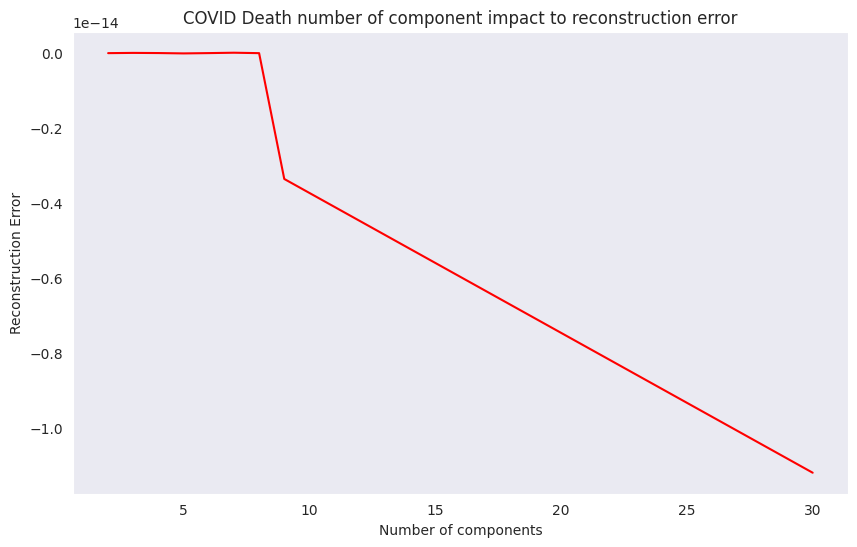

In [389]:
plt.figure(figsize=(10, 6))
plt.plot(lle_reconstruction_errors_df['n_component'], lle_reconstruction_errors_df['reconstruction_error'], color='r')
plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('COVID Death number of component impact to reconstruction error')
plt.grid()
plt.show()

In [61]:
print(best_n_component)

-1


In [390]:
lle = LocallyLinearEmbedding(n_components=7, method='standard', n_neighbors=10, n_jobs=-1)


In [391]:
X_reduced_lle = lle.fit_transform(X_sample_25)

In [392]:
np.save("X_reduced_lle.npy", X_reduced_lle)

# 4. Clustering on dimension reduction datasets  

In [393]:
def run_gmm_comparison(X_data, n_component_range=range(2, 31)):
    gmm_reduced_result = []
    for n_component in n_component_range:
        gmm = GaussianMixture(n_components=n_component, covariance_type='full')
        labels = gmm.fit_predict(X_data)
        bic_score = -gmm.bic(X_data)
        sh_score = silhouette_score(X_data, labels, metric='euclidean')
        
        gmm_reduced_result.append([n_component, bic_score, sh_score])
        
    gmm_reduced_result_df = pd.DataFrame(gmm_reduced_result, columns=['n_component', 'bic_score', 'silhouette_score'])
    
    return gmm_reduced_result_df

In [394]:
def run_dbscan_comparison(X_data, eps_range = np.arange(0.2, 2.4, 0.2)):
    cluster_result = []

    best_score = -np.inf
    best_eps = -1
    
    for eps in eps_range:
        dbscan = DBSCAN(eps=eps, min_samples=5)
        labels = dbscan.fit_predict(X_data)
        
        
        if len(np.unique(labels)) <=2:
            continue
    
        # Calculate the silhouette score as the evaluation metric
        score = silhouette_score(X_data, labels)
    
        if score > best_score:
            best_score = score
            best_eps = eps
    
        cluster_result.append([eps, score])
    cluster_result_df = pd.DataFrame(cluster_result, columns=['eps', 'silhouette_score'])
    return cluster_result_df

In [395]:
def plot_gmm_clustering_comparison(cluster_result_df, x_label, y_label, data_type=""):
    plt.figure()
    # plt.plot(range(2, 31), gmm_pca_reduced_result_df['bic_score'], color='r', label='bic_score')
    plt.plot(cluster_result_df[x_label], cluster_result_df[y_label], color='r', label=y_label)
    plt.xlabel("Number of component")
    plt.ylabel("Silhouette score")
    plt.title(f"COVID Death GMM component impact to Silhouette score of {data_type}")
    plt.grid()
    plt.show()
    
    
def plot_dbscan_clustering_comparison(cluster_result_df, x_label, y_label, data_type=""):
    plt.figure()
    # plt.plot(range(2, 31), gmm_pca_reduced_result_df['bic_score'], color='r', label='bic_score')
    plt.plot(cluster_result_df[x_label], cluster_result_df[y_label], color='r', label=y_label)
    plt.xlabel("Epsilon")
    plt.ylabel("Silhouette score")
    plt.title(f"COVID Death DBSCAN epsilon impact to Silhouette score of {data_type}")
    plt.grid()
    plt.show()

In [396]:
def sample_from_array(np_arr, sample_percent=0.25):
    sample_size = int(np_arr.shape[0]*sample_percent)
    random_indices = np.random.choice(np_arr.shape[0],  size=sample_size,  replace=False) 
    sampled_data = np_arr[random_indices, :]
    return sampled_data

## 4.1 PCA reduced data with GMM clustering

In [397]:
gmm_reduced_result = []

gmm = GaussianMixture(n_components=2, covariance_type='full')
labels = gmm.fit_predict(X_reduced_PCA)
bic_score = -gmm.bic(X_reduced_PCA)
sh_score = silhouette_score(X_reduced_PCA, labels, metric='euclidean')

gmm_reduced_result.append([2, bic_score, sh_score])
    
gmm_reduced_result_df = pd.DataFrame(gmm_reduced_result, columns=['n_component', 'bic_score', 'silhouette_score'])

In [398]:
X_reduced_sampled = sample_from_array(X_reduced_PCA, sample_percent=0.1)
print(X_reduced_sampled.shape)
gmm_reduced_result_df_pca = run_gmm_comparison(X_reduced_sampled)
gmm_reduced_result_df_pca.to_csv("gmm_reduced_result_df_pca.csv", index=False)

(3878, 11)


In [399]:
gmm_reduced_result_df_pca

,n_component,bic_score,silhouette_score
0,2,-68709.153005,0.227295
1,3,-57137.241788,0.205371
2,4,-50089.701909,0.214625
3,5,-48640.959069,0.193658
4,6,-41221.408285,0.172696
5,7,-41655.078062,0.162429
6,8,-37745.070374,0.159884
7,9,-35396.948468,0.139824
8,10,-35065.642875,0.153033
9,11,-30295.998425,0.134522


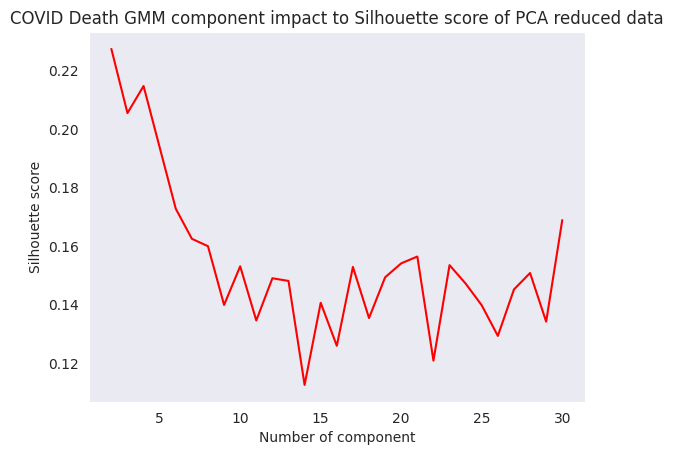

In [400]:
plot_gmm_clustering_comparison(gmm_reduced_result_df_pca, x_label='n_component', y_label='silhouette_score', data_type="PCA reduced data")

In [401]:
best_cluster_gmm_pca = GaussianMixture(n_components=4, covariance_type='full')
cluster_gmm_pca_labels = best_cluster_gmm_pca.fit_predict(X_reduced_PCA)

## 4.2 ICA reduced data with GMM clustering

In [402]:
X_reduced_sampled = sample_from_array(X_reduced_ICA, sample_percent=0.1)
gmm_reduced_result_df_ica = run_gmm_comparison(X_reduced_sampled)
gmm_reduced_result_df_ica.to_csv("gmm_reduced_result_df_ica.csv", index=False)

In [403]:
gmm_reduced_result_df_ica

,n_component,bic_score,silhouette_score
0,2,-298716.318634,0.038332
1,3,-271935.992865,0.083130
2,4,-127347.125182,0.070781
3,5,-107586.034997,0.069866
4,6,-171221.520267,0.077051
5,7,50785.101244,0.078939
6,8,-54302.305166,0.084946
7,9,-63433.821502,0.098861
8,10,-79299.428868,0.086491
9,11,61407.756561,0.124455


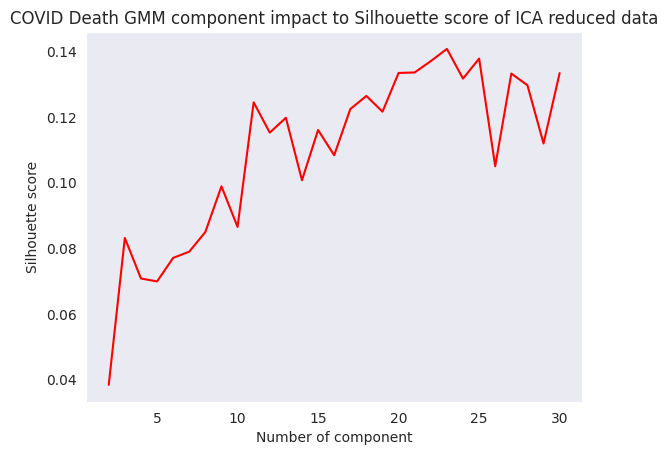

In [404]:
plot_gmm_clustering_comparison(gmm_reduced_result_df_ica, x_label='n_component', y_label='silhouette_score', data_type='ICA reduced data')

In [405]:
best_cluster_gmm_rp = GaussianMixture(n_components=15, covariance_type='full')
cluster_gmm_rp_labels = best_cluster_gmm_rp.fit_predict(X_reduced_ICA)

## 4.3 RP reduced data with GMM clustering

In [406]:
X_reduced_sampled = sample_from_array(X_reduced_rp_gaussian, sample_percent=0.1)
gmm_reduced_result_df_rp = run_gmm_comparison(X_reduced_sampled)
gmm_reduced_result_df_rp.to_csv("gmm_reduced_result_df_rp.csv", index=False)

In [407]:
gmm_reduced_result_df_rp

,n_component,bic_score,silhouette_score
0,2,-72680.129987,0.239453
1,3,-71128.886661,0.173599
2,4,-68127.563720,0.048402
3,5,-65822.646685,0.031289
4,6,-65636.495991,0.033049
5,7,-64947.164473,0.022182
6,8,-63592.291961,-0.005858
7,9,-58065.044766,-0.020867
8,10,-62166.718643,0.002840
9,11,-55719.637053,-0.024454


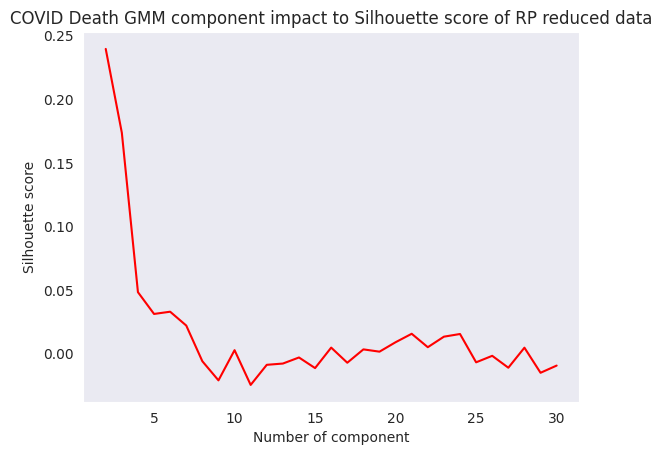

In [408]:
plot_gmm_clustering_comparison(gmm_reduced_result_df_rp, x_label='n_component', y_label='silhouette_score', data_type='RP reduced data')

In [409]:
best_cluster_gmm_rp = GaussianMixture(n_components=4, covariance_type='full')
cluster_gmm_labels_rp = best_cluster_gmm_rp.fit_predict(X_reduced_rp_gaussian)

## 4.4 LLE reduced data with GMM clustering

In [410]:
X_reduced_sampled = sample_from_array(X_reduced_lle, sample_percent=0.1)
gmm_reduced_result_df_lle = run_gmm_comparison(X_reduced_sampled)
gmm_reduced_result_df_lle.to_csv("gmm_reduced_result_df_pca.csv", index=False)

In [411]:
gmm_reduced_result_df_lle

,n_component,bic_score,silhouette_score
0,2,241089.126004,0.834407
1,3,288482.855350,0.433737
2,4,287838.197551,0.448886
3,5,284043.132526,0.547024
4,6,287819.896748,0.486228
5,7,290749.106843,0.366205
6,8,289839.370898,0.388533
7,9,291037.189491,0.289986
8,10,290405.117610,0.318874
9,11,290201.369646,0.356090


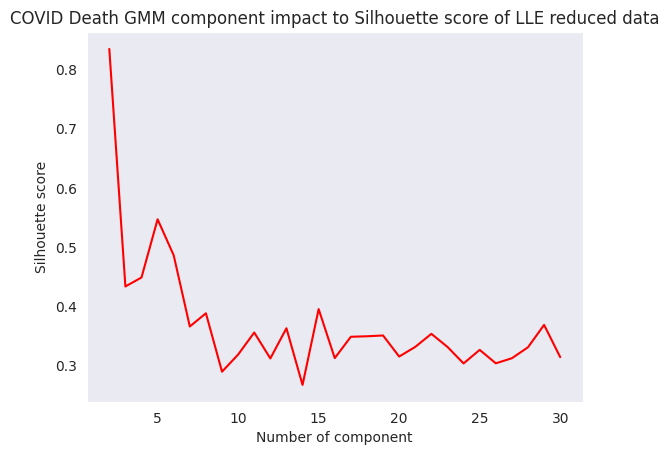

In [412]:
plot_gmm_clustering_comparison(gmm_reduced_result_df_lle, x_label='n_component', y_label='silhouette_score', data_type='LLE reduced data')

In [413]:
best_cluster_gmm_lle = GaussianMixture(n_components=5, covariance_type='full')
cluster_gmm_pca_labels = best_cluster_gmm_pca.fit_predict(X_reduced_lle)

## 4.5 PCA reduced data with DBSCAN clustering

In [414]:
X_reduced_PCA.shape

(38782, 11)

In [415]:
X_reduced_sampled = sample_from_array(X_reduced_PCA, sample_percent=0.1)
dbscan_reduced_result_df_pca = run_dbscan_comparison(X_reduced_sampled, 
                                                     eps_range=np.arange(0.1, 5, 0.1))
dbscan_reduced_result_df_pca.to_csv("dbscan_reduced_result_df_pca.csv", index=False)

In [416]:
dbscan_reduced_result_df_pca

,eps,silhouette_score
0,0.1,-0.324760
1,0.2,-0.306685
2,0.3,-0.157750
3,0.4,-0.033509
4,0.5,0.075542
5,0.6,0.102303
6,0.7,0.138432
7,0.8,0.137888
8,0.9,0.168728
9,1.0,0.061707


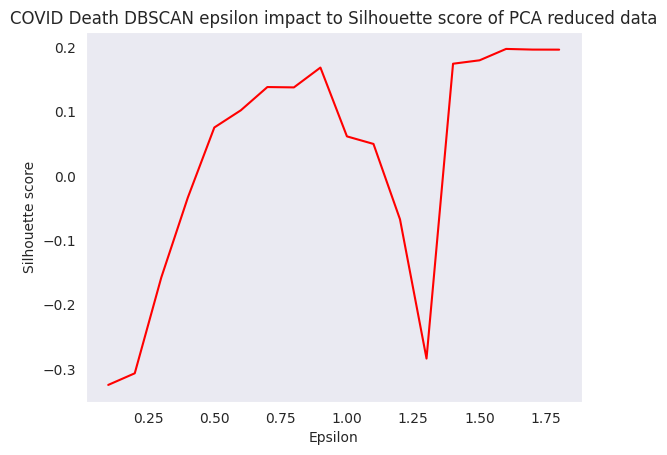

In [417]:
plot_dbscan_clustering_comparison(dbscan_reduced_result_df_pca, x_label='eps', y_label='silhouette_score', data_type='PCA reduced data')

In [418]:
best_cluster_dbscan_pca = bscan = DBSCAN(eps=1.8, min_samples=5)
cluster_dbscan_pca_labels = best_cluster_dbscan_pca.fit_predict(X_reduced_PCA)

## 4.6 ICA reduced data with DBSCAN clustering 

In [419]:
X_reduced_sampled = sample_from_array(X_reduced_ICA, sample_percent=0.1)
dbscan_reduced_result_df_ica = run_dbscan_comparison(X_reduced_sampled,
                                                     eps_range=np.arange(0.1, 5, 0.1)
                                                     )
dbscan_reduced_result_df_ica.to_csv("dbscan_reduced_result_df_ica.csv", index=False)

In [420]:
dbscan_reduced_result_df_ica

,eps,silhouette_score
0,0.6,-0.199886
1,0.7,-0.240019
2,0.8,-0.286145
3,0.9,-0.295985
4,1.0,-0.299455
5,1.1,-0.308251
6,1.2,-0.312579
7,1.3,-0.322494
8,1.4,-0.322132
9,1.5,-0.323312


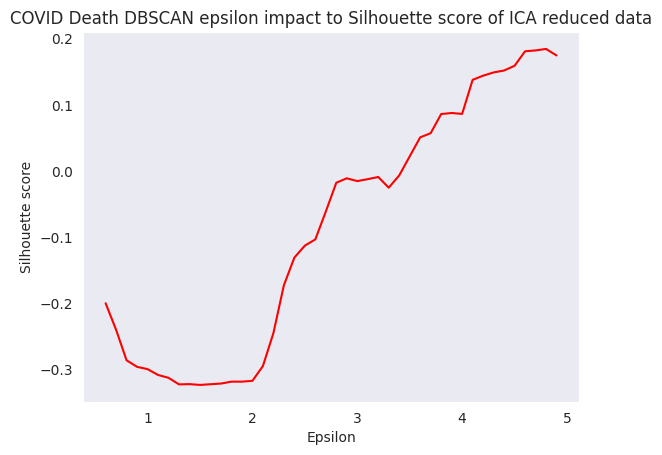

In [421]:
plot_dbscan_clustering_comparison(dbscan_reduced_result_df_ica, x_label='eps', y_label='silhouette_score', data_type='ICA reduced data')

In [422]:
best_cluster_dbscan_ica = DBSCAN(eps=4.8, min_samples=5)
cluster_dbscan_ica_labels = best_cluster_dbscan_ica.fit_predict(X_reduced_ICA)

# 4.7 RP reduced data with DBSCAN clustering

In [423]:
X_reduced_sampled = sample_from_array(X_reduced_rp_gaussian, sample_percent=0.1)
dbscan_reduced_result_df_rp = run_dbscan_comparison(X_reduced_sampled,
                                                    eps_range=np.arange(0.1, 5, 0.1)
                                                    )
dbscan_reduced_result_df_rp.to_csv("dbscan_reduced_result_df_rp.csv", index=False)

In [424]:
dbscan_reduced_result_df_rp

,eps,silhouette_score
0,0.1,-0.339176
1,0.2,-0.427867
2,0.3,-0.430422
3,0.4,-0.431146
4,0.5,-0.431084
5,0.6,-0.336103
6,0.7,-0.331951
7,0.8,-0.320169
8,0.9,-0.293356
9,1.0,-0.268681


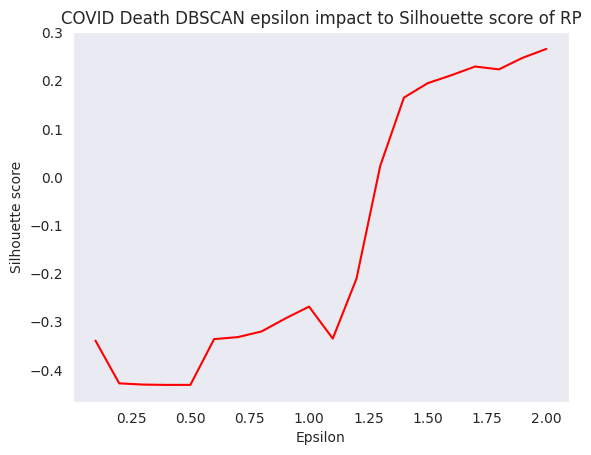

In [425]:
plot_dbscan_clustering_comparison(dbscan_reduced_result_df_rp, x_label='eps', y_label='silhouette_score', data_type='RP')

In [426]:
best_cluster_dbscan_rp = DBSCAN(eps=2.0, min_samples=5)
cluster_dbscan_rp_labels = best_cluster_dbscan_rp.fit_predict(X_reduced_rp_gaussian)

## 4.8 LLE reduced data with DBSCAN clustering

In [427]:
X_reduced_sampled = sample_from_array(X_reduced_lle, sample_percent=0.1)
dbscan_reduced_result_df_lle = run_dbscan_comparison(X_reduced_sampled, eps_range=np.arange(0.001, 0.1, 0.001))
dbscan_reduced_result_df_lle.to_csv("dbscan_reduced_result_df_lle.csv", index=False)

In [428]:
dbscan_reduced_result_df_lle

,eps,silhouette_score
0,0.001,-0.348861
1,0.002,-0.079046
2,0.003,0.085302
3,0.004,0.185065
4,0.005,0.389283
5,0.006,0.415619
6,0.007,0.429252
7,0.008,0.471430
8,0.009,0.492404
9,0.010,0.487630


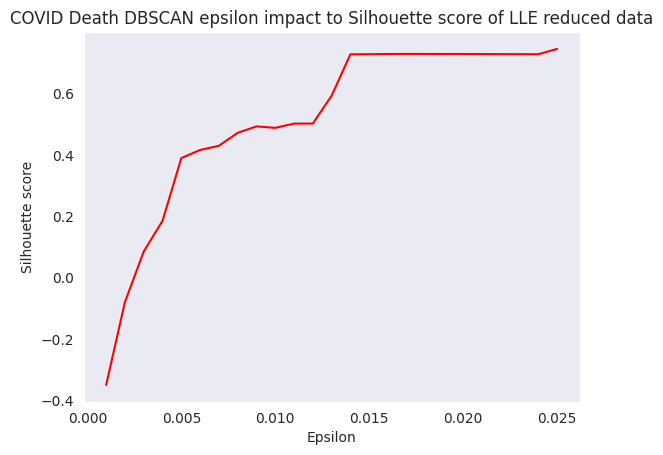

In [429]:
plot_dbscan_clustering_comparison(dbscan_reduced_result_df_lle, x_label='eps', y_label='silhouette_score', data_type='LLE reduced data')

In [430]:
best_cluster_dbscan_lle = DBSCAN(eps=0.021, min_samples=5)
cluster_dbscan_lle_labels = best_cluster_dbscan_rp.fit_predict(X_reduced_lle)

# 5. NN classifier on Dimension Reduction data

In [433]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.neural_network import MLPClassifier
import time

def fit_cal_nn_metrics(X_train, y_train, X_test, y_test, 
                       hidden_layer_sizes=(25, 25),
                       activation='relu',
                       solver='adam', random_state=random_seed):
    
    model = MLPClassifier(random_state=random_state, early_stopping=True,
                                         hidden_layer_sizes=hidden_layer_sizes,
                                         activation=activation,
                                         solver=solver,
                                        )
    
    train_start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - train_start_time
    
    pred_start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - pred_start_time
    acc_score = accuracy_score(y_test, y_pred)
    f_score = f1_score(y_test, y_pred)

    return model, acc_score, f_score, train_time, pred_time


In [434]:
reduced_nn_result = []
test_rate = 0.25

## 5.1 NN with PCA reduced data

In [435]:
nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(X_reduced_PCA, 
                                                                y_sample_25, 
                                                                test_size=test_rate, 
                                                                random_state=random_seed)
                                                                             
nn_model, nn_acc, nn_f1, train_time, pred_time = fit_cal_nn_metrics(nn_X_train, nn_y_train, 
                                                                    nn_X_test, nn_y_test)
reduced_nn_result.append(['pca_reduced', nn_acc, nn_f1, train_time, pred_time])

## 5.2 NN with ICA reduced data

In [436]:
nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(X_reduced_ICA, 
                                                                y_sample_25, 
                                                                test_size=test_rate, 
                                                                random_state=random_seed)
                                                                             
nn_model, nn_acc, nn_f1, train_time, pred_time = fit_cal_nn_metrics(nn_X_train, nn_y_train, 
                                                                    nn_X_test, nn_y_test)
reduced_nn_result.append(['ica_reduced', nn_acc, nn_f1, train_time, pred_time])

## 5.3 NN with RP reduced data

In [437]:
nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(X_reduced_rp_gaussian, 
                                                                y_sample_25, 
                                                                test_size=test_rate, 
                                                                random_state=random_seed)
                                                                             
nn_model, nn_acc, nn_f1, train_time, pred_time = fit_cal_nn_metrics(nn_X_train, nn_y_train, 
                                                                    nn_X_test, nn_y_test)
reduced_nn_result.append(['rp_reduced', nn_acc, nn_f1, train_time, pred_time])

## 5.4 NN with LLE reduced data

In [438]:
nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(X_reduced_lle,
                                                                y_sample_25, 
                                                                test_size=test_rate, 
                                                                random_state=random_seed)
                                                                             
nn_model, nn_acc, nn_f1, train_time, pred_time = fit_cal_nn_metrics(nn_X_train, nn_y_train, 
                                                                    nn_X_test, nn_y_test)
reduced_nn_result.append(['lle_reduced', nn_acc, nn_f1, train_time, pred_time])

## 5.5 NN with original data

In [439]:
nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(X, y, 
                                                                test_size=test_rate, 
                                                                random_state=random_seed)
nn_model, nn_acc, nn_f1, train_time, pred_time = fit_cal_nn_metrics(nn_X_train, nn_y_train, 
                                                                    nn_X_test, nn_y_test)
reduced_nn_result.append(['original', nn_acc, nn_f1, train_time, pred_time])

## 5.6 Summary

In [440]:
reduced_nn_result

[['pca_reduced',
  0.7795998349834984,
  0.5083965953531171,
  1.325498104095459,
  0.0028204917907714844],
 ['ica_reduced',
  0.7938325082508251,
  0.5554814320658217,
  1.3392210006713867,
  0.008803367614746094],
 ['rp_reduced',
  0.7667079207920792,
  0.47321844434094085,
  2.835327625274658,
  0.0017058849334716797],
 ['lle_reduced',
  0.7178217821782178,
  0.0,
  1.0591790676116943,
  0.05001068115234375],
 ['original',
  0.7946985715022433,
  0.5828792958927075,
  3.408142328262329,
  0.023282766342163086]]

In [441]:
reduced_nn_result_df = pd.DataFrame(reduced_nn_result, columns = ["Type of data", "Accuracy", "F1 score", "Train time", "Inference time"])

In [442]:
reduced_nn_result_df

,Type of data,Accuracy,F1 score,Train time,Inference time
0,pca_reduced,0.779600,0.508397,1.325498,0.002820
1,ica_reduced,0.793833,0.555481,1.339221,0.008803
2,rp_reduced,0.766708,0.473218,2.835328,0.001706
3,lle_reduced,0.717822,0.000000,1.059179,0.050011
4,original,0.794699,0.582879,3.408142,0.023283


# 6. COVID Death NN classifier with cluster as new Feature

In [443]:
cluster_nn_result = []

## 6.1 GMM cluster as new feature to NN

In [444]:
nn_gmm_label_result = []
for n_component in range(2, 31):
    print(f"n_component: {n_component}")
    best_gmm = GaussianMixture(n_components=n_component, covariance_type='full')
    best_gmm.fit(X_sample)
    bic_score = best_gmm.bic(X_sample)
    labels = best_gmm.predict(X)

    X_extend = X.copy()
    y_extend = y.copy() 
    X_extend['cluster_labels'] = labels
    nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(X_extend, y_extend, 
                                                                    test_size=test_rate, 
                                                                    random_state=random_seed)
    
    nn_model, nn_acc, nn_f1, train_time, pred_time = fit_cal_nn_metrics(nn_X_train, nn_y_train, 
                                                                        nn_X_test, nn_y_test)
    cluster_nn_result.append(['gmm_cluster', f'n_component:{n_component}', nn_acc, nn_f1, train_time, pred_time])

n_component: 2
n_component: 3
n_component: 4
n_component: 5
n_component: 6
n_component: 7
n_component: 8
n_component: 9
n_component: 10
n_component: 11
n_component: 12
n_component: 13
n_component: 14
n_component: 15
n_component: 16
n_component: 17
n_component: 18
n_component: 19
n_component: 20
n_component: 21
n_component: 22
n_component: 23
n_component: 24
n_component: 25
n_component: 26
n_component: 27
n_component: 28
n_component: 29
n_component: 30


## 6.2 DBSCAN cluster as new feature to NN

In [445]:
for eps in np.arange(0.2, 2.4, 0.2):
    print(f"eps: {eps}")
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)

    X_extend = X.copy()
    y_extend = y.copy()
    X_extend['cluster_labels'] = labels  
    
    nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(X_extend, y_extend, 
                                                                    test_size=test_rate, 
                                                                    random_state=random_seed)
    
    nn_model, nn_acc, nn_f1, train_time, pred_time = fit_cal_nn_metrics(nn_X_train, nn_y_train, 
                                                                        nn_X_test, nn_y_test)
    cluster_nn_result.append(['dbscan_cluster', f'eps:{eps}', nn_acc, nn_f1, train_time, pred_time])

eps: 0.2
eps: 0.4
eps: 0.6000000000000001
eps: 0.8
eps: 1.0
eps: 1.2
eps: 1.4000000000000001
eps: 1.6
eps: 1.8
eps: 2.0
eps: 2.2


In [446]:
np.unique(best_dbscan_labels)

array([  -1,    0,    1, ..., 5637, 5638, 5639])

## 6.3 Original data to NN

In [447]:
X.columns

Index(['AGE', 'USMER_1', 'USMER_2', 'MEDICAL_UNIT_1', 'MEDICAL_UNIT_2',
       'MEDICAL_UNIT_3', 'MEDICAL_UNIT_4', 'MEDICAL_UNIT_5', 'MEDICAL_UNIT_6',
       'MEDICAL_UNIT_7', 'MEDICAL_UNIT_8', 'MEDICAL_UNIT_9', 'MEDICAL_UNIT_10',
       'MEDICAL_UNIT_11', 'MEDICAL_UNIT_12', 'MEDICAL_UNIT_13', 'SEX_female',
       'SEX_male', 'PATIENT_TYPE_Hospitalization', 'PATIENT_TYPE_Return_home',
       'INTUBED_No', 'INTUBED_Unknown', 'INTUBED_Yes', 'PNEUMONIA_No',
       'PNEUMONIA_Unknown', 'PNEUMONIA_Yes', 'PREGNANT_No', 'PREGNANT_Unknown',
       'PREGNANT_Yes', 'DIABETES_No', 'DIABETES_Unknown', 'DIABETES_Yes',
       'COPD_No', 'COPD_Unknown', 'COPD_Yes', 'ASTHMA_No', 'ASTHMA_Unknown',
       'ASTHMA_Yes', 'INMSUPR_No', 'INMSUPR_Unknown', 'INMSUPR_Yes',
       'HIPERTENSION_No', 'HIPERTENSION_Unknown', 'HIPERTENSION_Yes',
       'OTHER_DISEASE_No', 'OTHER_DISEASE_Unknown', 'OTHER_DISEASE_Yes',
       'CARDIOVASCULAR_No', 'CARDIOVASCULAR_Unknown', 'CARDIOVASCULAR_Yes',
       'OBESITY_No', '

In [448]:
nn_X_train, nn_X_test, nn_y_train, nn_y_test = train_test_split(X, y, 
                                                                test_size=test_rate, 
                                                                random_state=random_seed)
nn_model, nn_acc, nn_f1, train_time, pred_time = fit_cal_nn_metrics(nn_X_train, nn_y_train, 
                                                                    nn_X_test, nn_y_test)
cluster_nn_result.append(['original', None, nn_acc, nn_f1, train_time, pred_time])

## 6.4 Performance comparison

In [449]:
cluster_nn_result_df = pd.DataFrame(cluster_nn_result, columns=["cluster_name", 'key_parameter', 'acc_score', 'f1_score', 'train_time', 'inference_time'])

In [450]:
cluster_nn_result_df

,cluster_name,key_parameter,acc_score,f1_score,train_time,inference_time
0,gmm_cluster,n_component:2,0.795395,0.551518,4.754142,0.012384
1,gmm_cluster,n_component:3,0.795756,0.549098,4.542173,0.009998
2,gmm_cluster,n_component:4,0.798180,0.556217,10.441627,0.010443
3,gmm_cluster,n_component:5,0.795782,0.546859,3.479180,0.010994
4,gmm_cluster,n_component:6,0.797097,0.575955,7.190666,0.010508
5,gmm_cluster,n_component:7,0.797509,0.579356,7.339877,0.011601
6,gmm_cluster,n_component:8,0.795885,0.575459,6.196126,0.011532
7,gmm_cluster,n_component:9,0.796478,0.575485,6.952788,0.010977
8,gmm_cluster,n_component:10,0.795317,0.570408,6.212976,0.010432
9,gmm_cluster,n_component:11,0.796271,0.589580,7.805319,0.010302


In [459]:
cluster_nn_result_df.to_csv("cluster_nn_result_df.csv")

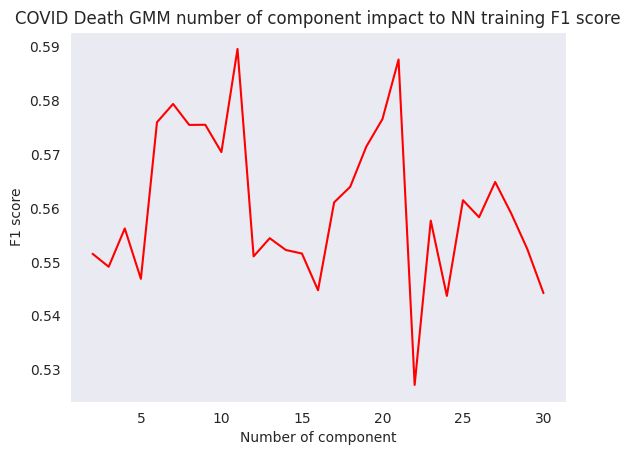

In [454]:
# for cluster_name, color in zip(cluster_nn_result_df['cluster_nn_result_df'].unique(), ['r', 'b', 'g']):
df = cluster_nn_result_df[cluster_nn_result_df['cluster_name'] == 'gmm_cluster']
plt.plot(range(2, 31), df['f1_score'], color='r') 
plt.xlabel("Number of component")
plt.ylabel("F1 score")
plt.title(f"COVID Death GMM number of component impact to NN training F1 score")
plt.grid()
plt.show()

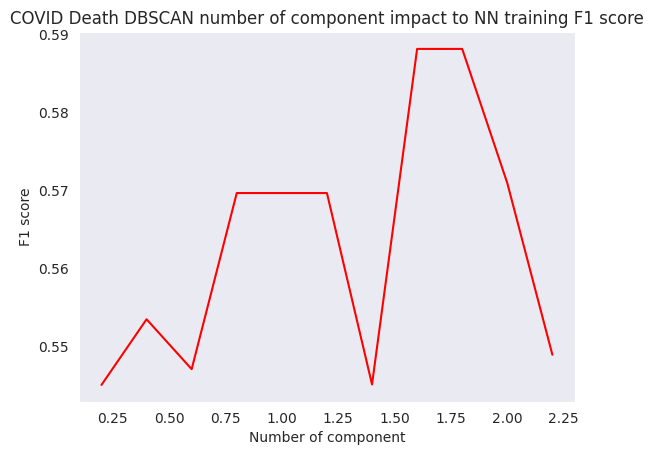

In [458]:
df = cluster_nn_result_df[cluster_nn_result_df['cluster_name'] == 'dbscan_cluster']
plt.plot(np.arange(0.2, 2.4, 0.2), df['f1_score'], color='r') 
plt.xlabel("Number of component")
plt.ylabel("F1 score")
plt.title(f"COVID Death DBSCAN number of component impact to NN training F1 score")
plt.grid()
plt.show()

In [455]:
df = cluster_nn_result_df[cluster_nn_result_df['cluster_name'] == 'dbscan_cluster']
df['key_parameter']

29                   eps:0.2
30                   eps:0.4
31    eps:0.6000000000000001
32                   eps:0.8
33                   eps:1.0
34                   eps:1.2
35    eps:1.4000000000000001
36                   eps:1.6
37                   eps:1.8
38                   eps:2.0
39                   eps:2.2
Name: key_parameter, dtype: object